<a href="https://colab.research.google.com/github/beingshub02/Deep-Learning-Summer-School-IIITDM/blob/main/25DLS455.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Q1: Compare the Loss Functions

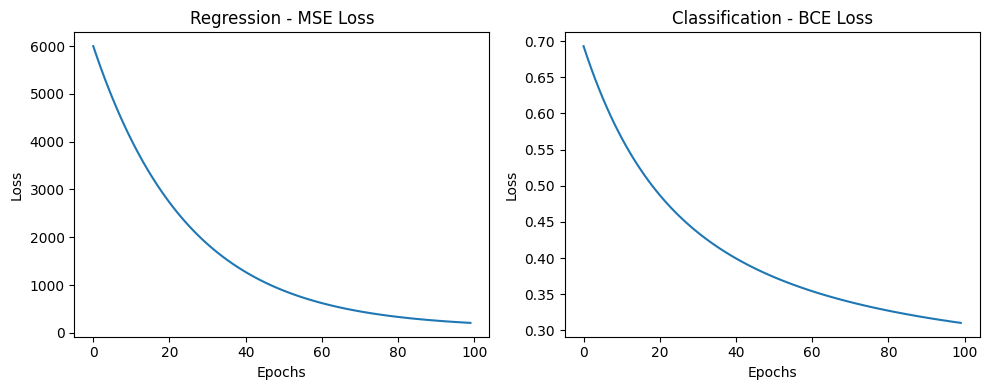

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.special import expit  # sigmoid

# ------------------------------
# Helper functions
# ------------------------------
def sigmoid(x):
    return expit(x)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def bce_loss(y_true, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# ------------------------------
# Train function for regression
# ------------------------------
def train_regression(X, y, lr=0.01, epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    loss_history = []

    for epoch in range(epochs):
        y_pred = np.dot(X, weights) + bias
        loss = mse_loss(y, y_pred)
        loss_history.append(loss)

        # Gradients
        dw = -(2/n_samples) * np.dot(X.T, (y - y_pred))
        db = -(2/n_samples) * np.sum(y - y_pred)

        # Update
        weights -= lr * dw
        bias -= lr * db

    return loss_history

# ------------------------------
# Train function for classification
# ------------------------------
def train_classification(X, y, lr=0.01, epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    loss_history = []

    for epoch in range(epochs):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
        loss = bce_loss(y, y_pred)
        loss_history.append(loss)

        # Gradients
        dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
        db = (1/n_samples) * np.sum(y_pred - y)

        # Update
        weights -= lr * dw
        bias -= lr * db

    return loss_history

# ------------------------------
# Regression Task
# ------------------------------
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=10)
X_reg = StandardScaler().fit_transform(X_reg)
loss_reg = train_regression(X_reg, y_reg, lr=0.01, epochs=100)

# ------------------------------
# Classification Task
# ------------------------------
X_cls, y_cls = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)
X_cls = StandardScaler().fit_transform(X_cls)
loss_cls = train_classification(X_cls, y_cls, lr=0.1, epochs=100)

# ------------------------------
# Plotting Losses
# ------------------------------
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_reg)
plt.title("Regression - MSE Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(loss_cls)
plt.title("Classification - BCE Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.tight_layout()
plt.show()


 Q2: Compare the Learning Rate Effects

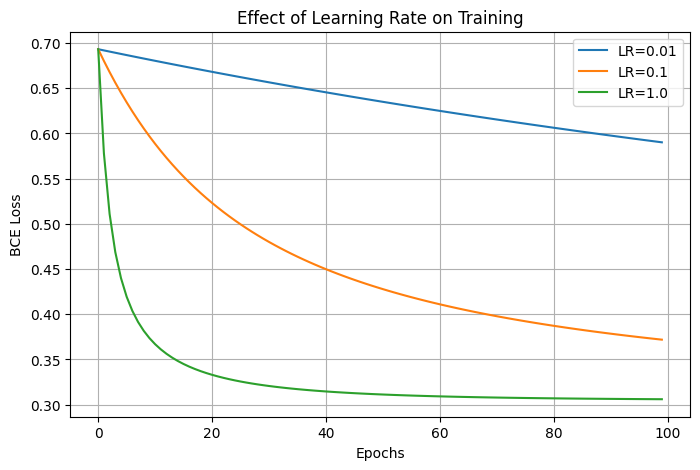

In [2]:
def train_with_lr(X, y, lr, epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    loss_history = []

    for epoch in range(epochs):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
        loss = bce_loss(y, y_pred)
        loss_history.append(loss)

        dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
        db = (1/n_samples) * np.sum(y_pred - y)

        weights -= lr * dw
        bias -= lr * db

    return loss_history

# Dataset
X_lr, y_lr = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)
X_lr = StandardScaler().fit_transform(X_lr)

lrs = [0.01, 0.1, 1.0]
losses = []

for lr in lrs:
    loss = train_with_lr(X_lr, y_lr, lr=lr, epochs=100)
    losses.append(loss)

# Plotting
plt.figure(figsize=(8, 5))
for i, lr in enumerate(lrs):
    plt.plot(losses[i], label=f"LR={lr}")
plt.title("Effect of Learning Rate on Training")
plt.xlabel("Epochs")
plt.ylabel("BCE Loss")
plt.legend()
plt.grid(True)
plt.show()
